### 1 What is the type of attributes in the data?
###    variance_of_Wavelet_Transformed_image     float64
###    skewness_of_Wavelet_Transformed_image     float64
###    curtosis_of_Wavelet_Transformed_image     float64
###    entropy_of_image                          float64
###    class                                       int64
### 2 Explore the data to check, whether is it balance?
###    balance
### 3 What attribute is useful and what is not? why?
###    all attribute is useful，After verification, the four basic attributes are closely related to class.
### Try using 1 other parameter configurations and compare them to their default 
###    Details can be found at the end of the experimental code


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import the dataset and define the features
df = pd.read_csv('Lab Exercise/banknote.csv',
                      names=['variance_of_Wavelet_Transformed_image','skewness_of_Wavelet_Transformed_image ',
                             'curtosis_of_Wavelet_Transformed_image ','entropy_of_image','class'])



df.head(5)
print(df.head(5).dtypes)

variance_of_Wavelet_Transformed_image     float64
skewness_of_Wavelet_Transformed_image     float64
curtosis_of_Wavelet_Transformed_image     float64
entropy_of_image                          float64
class                                       int64
dtype: object


<Axes: >

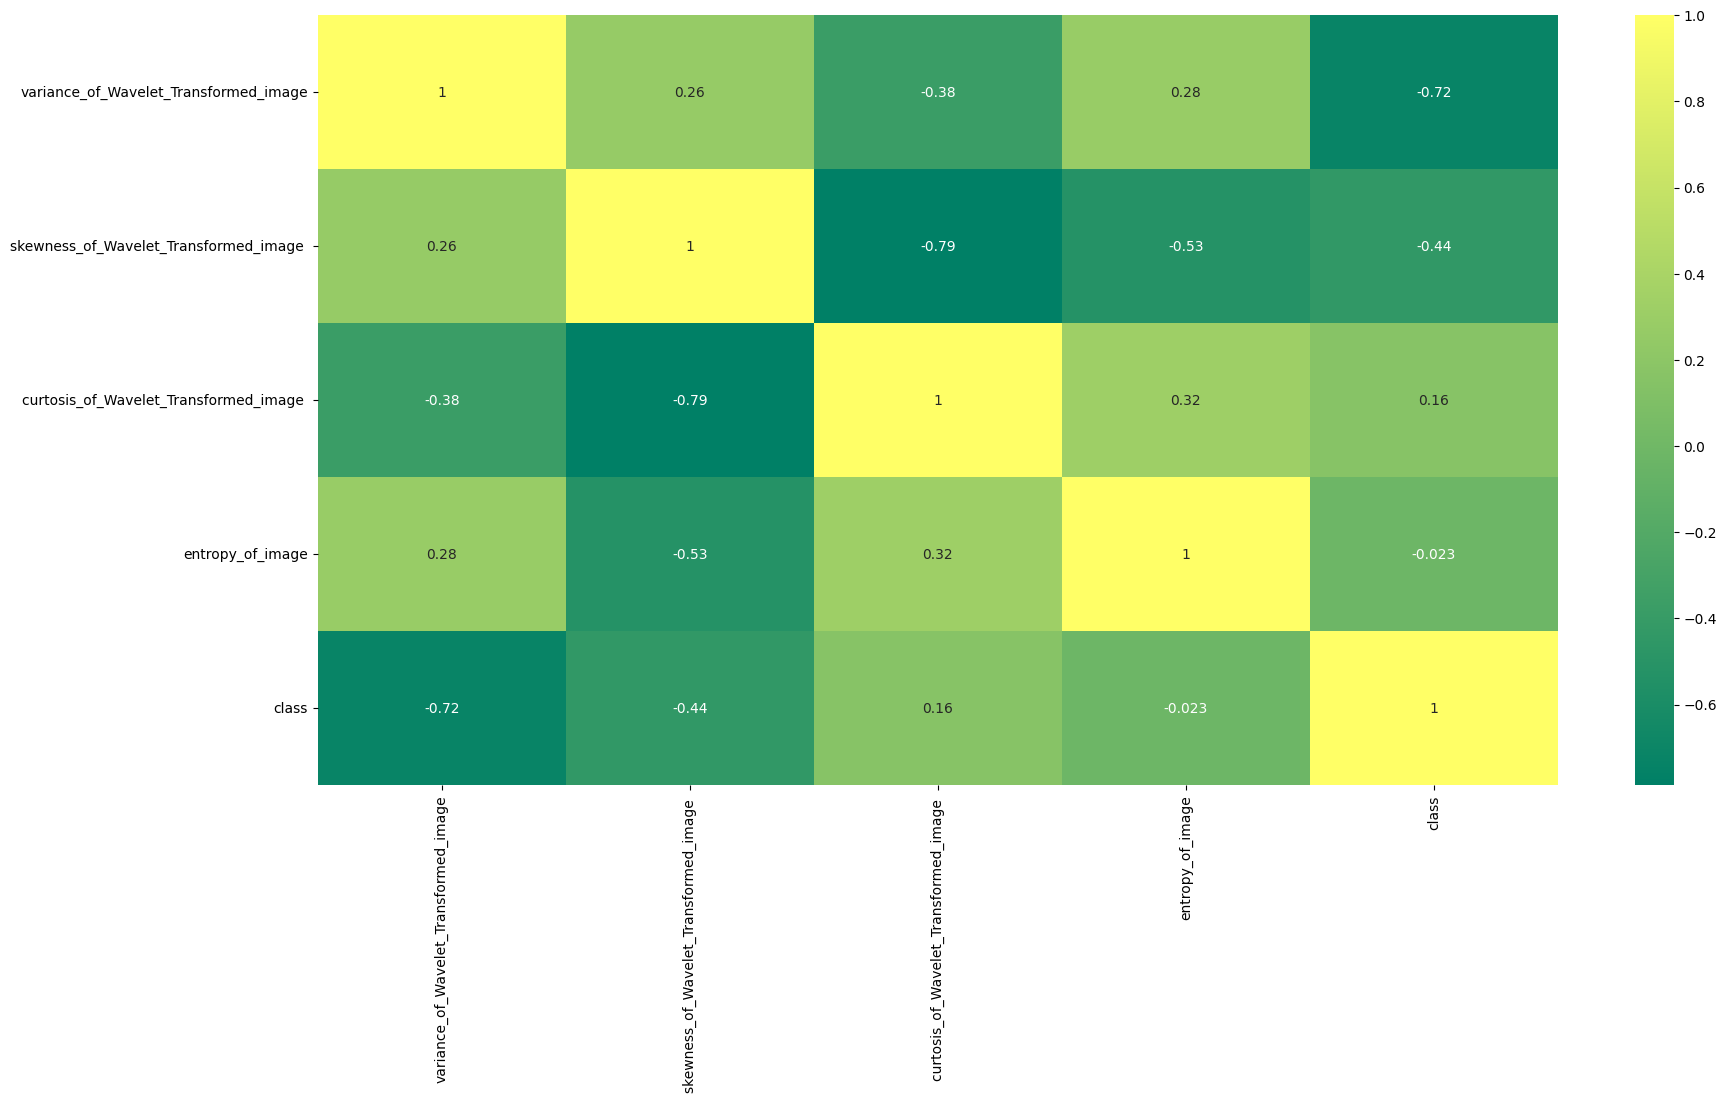

In [8]:
import seaborn as sns

# correlations using heat map plot
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='summer')

<Axes: xlabel='class', ylabel='count'>

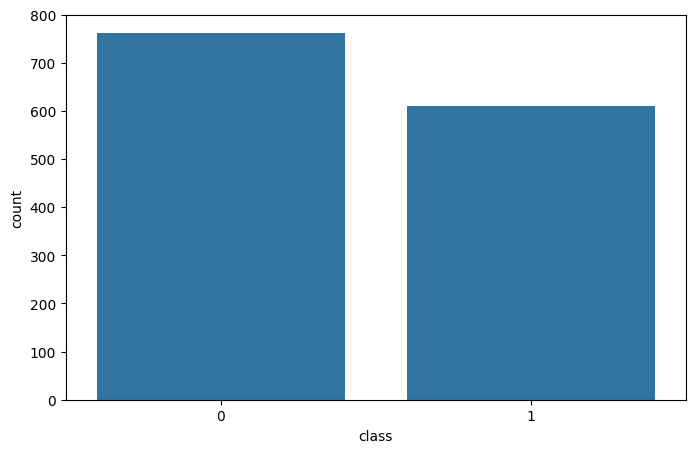

In [9]:
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="class", data=df)

In [10]:
X = df.iloc[:,:-1] # Select all attributes except the last one (descriptive attributes)
y = df.iloc[:,-1] # Classification on animal 'class' (target attribute)
# import machine learning library to sample the data
from sklearn.model_selection import train_test_split

# split the data into training set and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

From here, we apply the decision tree model and draw the results output using the `sklearn` confusion matrix. As such, we can justify and determine the *number* of instances being **correctly classified** and **misclassified**.

The prediction accuracy is: 98.54%


Text(0.5, 25.722222222222214, 'Predicted label')

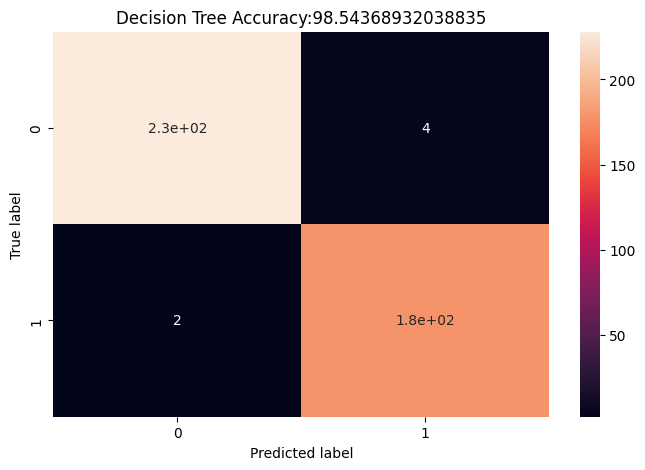

In [11]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(x_test)

print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['0','1'], 
                     columns = ['0','1'])

# plot the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)
plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

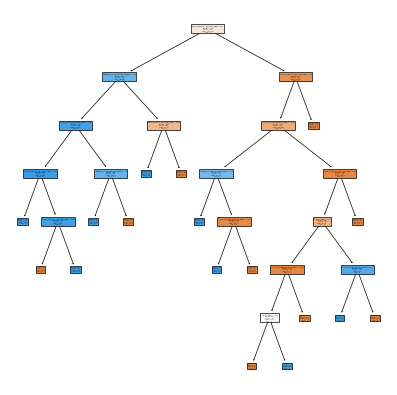

In [12]:
#Plotting the Tree
from sklearn import tree
fn = ['variance_of_Wavelet_Transformed_image','skewness_of_Wavelet_Transformed_image ',
                             'curtosis_of_Wavelet_Transformed_image ','entropy_of_image','class']
cn = ["0","1"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=50)
tree.plot_tree(dtree, filled = True, feature_names = fn, class_names = cn);
fig.savefig('lab3.svg')

In [27]:
predictgini_mean=0
predictlog_loss_mean=0
predictbest_mean=0
predictbestlog2_mean=0
for i in range(10):
    dtreegini = DecisionTreeClassifier(criterion = 'gini').fit(x_train, y_train)
    # predict the classes of new, unseen data
    predictgini = dtreegini.predict(x_test)
    #print("dtreegini prediction accuracy is: {0:2.2f}{1:s}".format(dtreegini.score(x_test,y_test)*100,"%"))
    predictgini_mean+=dtreegini.score(x_test,y_test)*100
    
    dtreelog_loss = DecisionTreeClassifier(criterion = 'log_loss').fit(x_train, y_train)
    # predict the classes of new, unseen data
    predictlog_loss = dtreelog_loss.predict(x_test)
    #print("dtreelog_loss prediction accuracy is: {0:2.2f}{1:s}".format(dtreelog_loss.score(x_test,y_test)*100,"%"))
    predictlog_loss_mean+=dtreelog_loss.score(x_test,y_test)*100
    
    dtreebest = DecisionTreeClassifier(criterion = 'entropy',splitter='best').fit(x_train, y_train)
    # predict the classes of new, unseen data
    predictbest = dtreebest.predict(x_test)
    #print("dtreelogbest prediction accuracy is: {0:2.2f}{1:s}".format(dtreebest.score(x_test,y_test)*100,"%"))
    predictbest_mean+=dtreebest.score(x_test,y_test)*100
    
    dtreebestlog2 = DecisionTreeClassifier(criterion = 'entropy',splitter='best',max_features='log2').fit(x_train, y_train)
    # predict the classes of new, unseen data
    predictbestlog2 = dtreebestlog2.predict(x_test)
    #print("dtreelogbestautolog2 prediction accuracy is: {0:2.2f}{1:s}".format(dtreebestlog2.score(x_test,y_test)*100,"%"))
    predictbestlog2_mean+=dtreebestlog2.score(x_test,y_test)*100
print(predictgini_mean/10)
print(predictlog_loss_mean/10)
print(predictbest_mean/10)
print(predictbestlog2_mean/10)


97.74271844660194
98.3495145631068
98.20388349514563
98.25242718446603


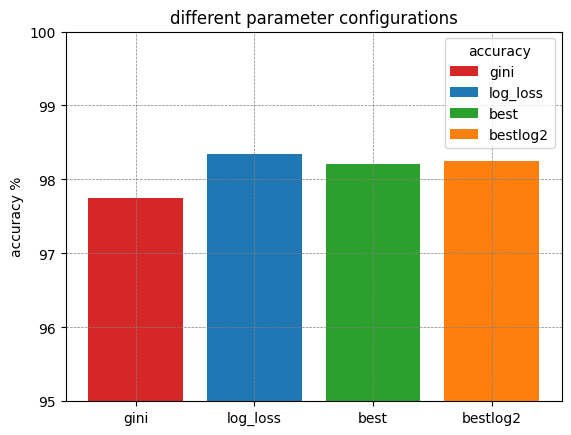

In [37]:
fig, ax = plt.subplots()

different = ['gini', 'log_loss', 'best', 'bestlog2']
counts = [predictgini_mean/10, predictlog_loss_mean/10, predictbest_mean/10, predictbestlog2_mean/10]
bar_labels = ['gini', 'log_loss', 'best', 'bestlog2']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(different, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('accuracy %')
ax.set_title('different parameter configurations')
ax.legend(title='accuracy')
plt.ylim(95,100)
plt.grid(color = 'grey',linestyle = '--', linewidth = 0.5)
plt.show()